In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [11]:
df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [12]:
df.shape

(301, 9)

In [13]:
print('We have Car in those Fuel Variant',df['Fuel_Type'].unique())
print('We have such Seller Type',df['Seller_Type'].unique())
print('We have Car Transmission type',df['Transmission'].unique())
print('We have such owner of car',df['Owner'].unique())

We have Car in those Fuel Variant ['Petrol' 'Diesel' 'CNG']
We have such Seller Type ['Dealer' 'Individual']
We have Car Transmission type ['Manual' 'Automatic']
We have such owner of car [0 1 3]


In [14]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [15]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [16]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Car_Name,301,98,city,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,301.0,NaN,NaN,NaN,2013.627907,2.891554,2003.0,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,NaN,NaN,NaN,4.661296,5.082812,0.1,0.9,3.6,6.0,35.0
Present_Price,301.0,NaN,NaN,NaN,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,NaN,NaN,NaN,36947.20598,38886.883882,500.0,15000.0,32000.0,48767.0,500000.0
Fuel_Type,301,3,Petrol,239,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seller_Type,301,2,Dealer,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,301,2,Manual,261,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner,301.0,NaN,NaN,NaN,0.043189,0.247915,0.0,0.0,0.0,0.0,3.0


In [17]:
today = datetime.date.today()
this_year = today.year
print(this_year)

2024


In [18]:
df['Years_old'] = this_year -  df['Year'] 

In [19]:
df['Years_old']

0      10
1      11
2       7
3      13
4      10
       ..
296     8
297     9
298    15
299     7
300     8
Name: Years_old, Length: 301, dtype: int64

In [20]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Years_old'],
      dtype='object')

In [22]:
new_dataset = df[['Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Years_old']]

In [23]:
new_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years_old
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [24]:
new_dataset = pd.get_dummies(new_dataset, drop_first= True)

In [25]:
new_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,10,False,True,False,True
1,4.75,9.54,43000,0,11,True,False,False,True
2,7.25,9.85,6900,0,7,False,True,False,True
3,2.85,4.15,5200,0,13,False,True,False,True
4,4.60,6.87,42450,0,10,True,False,False,True


In [26]:
new_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Years_old,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


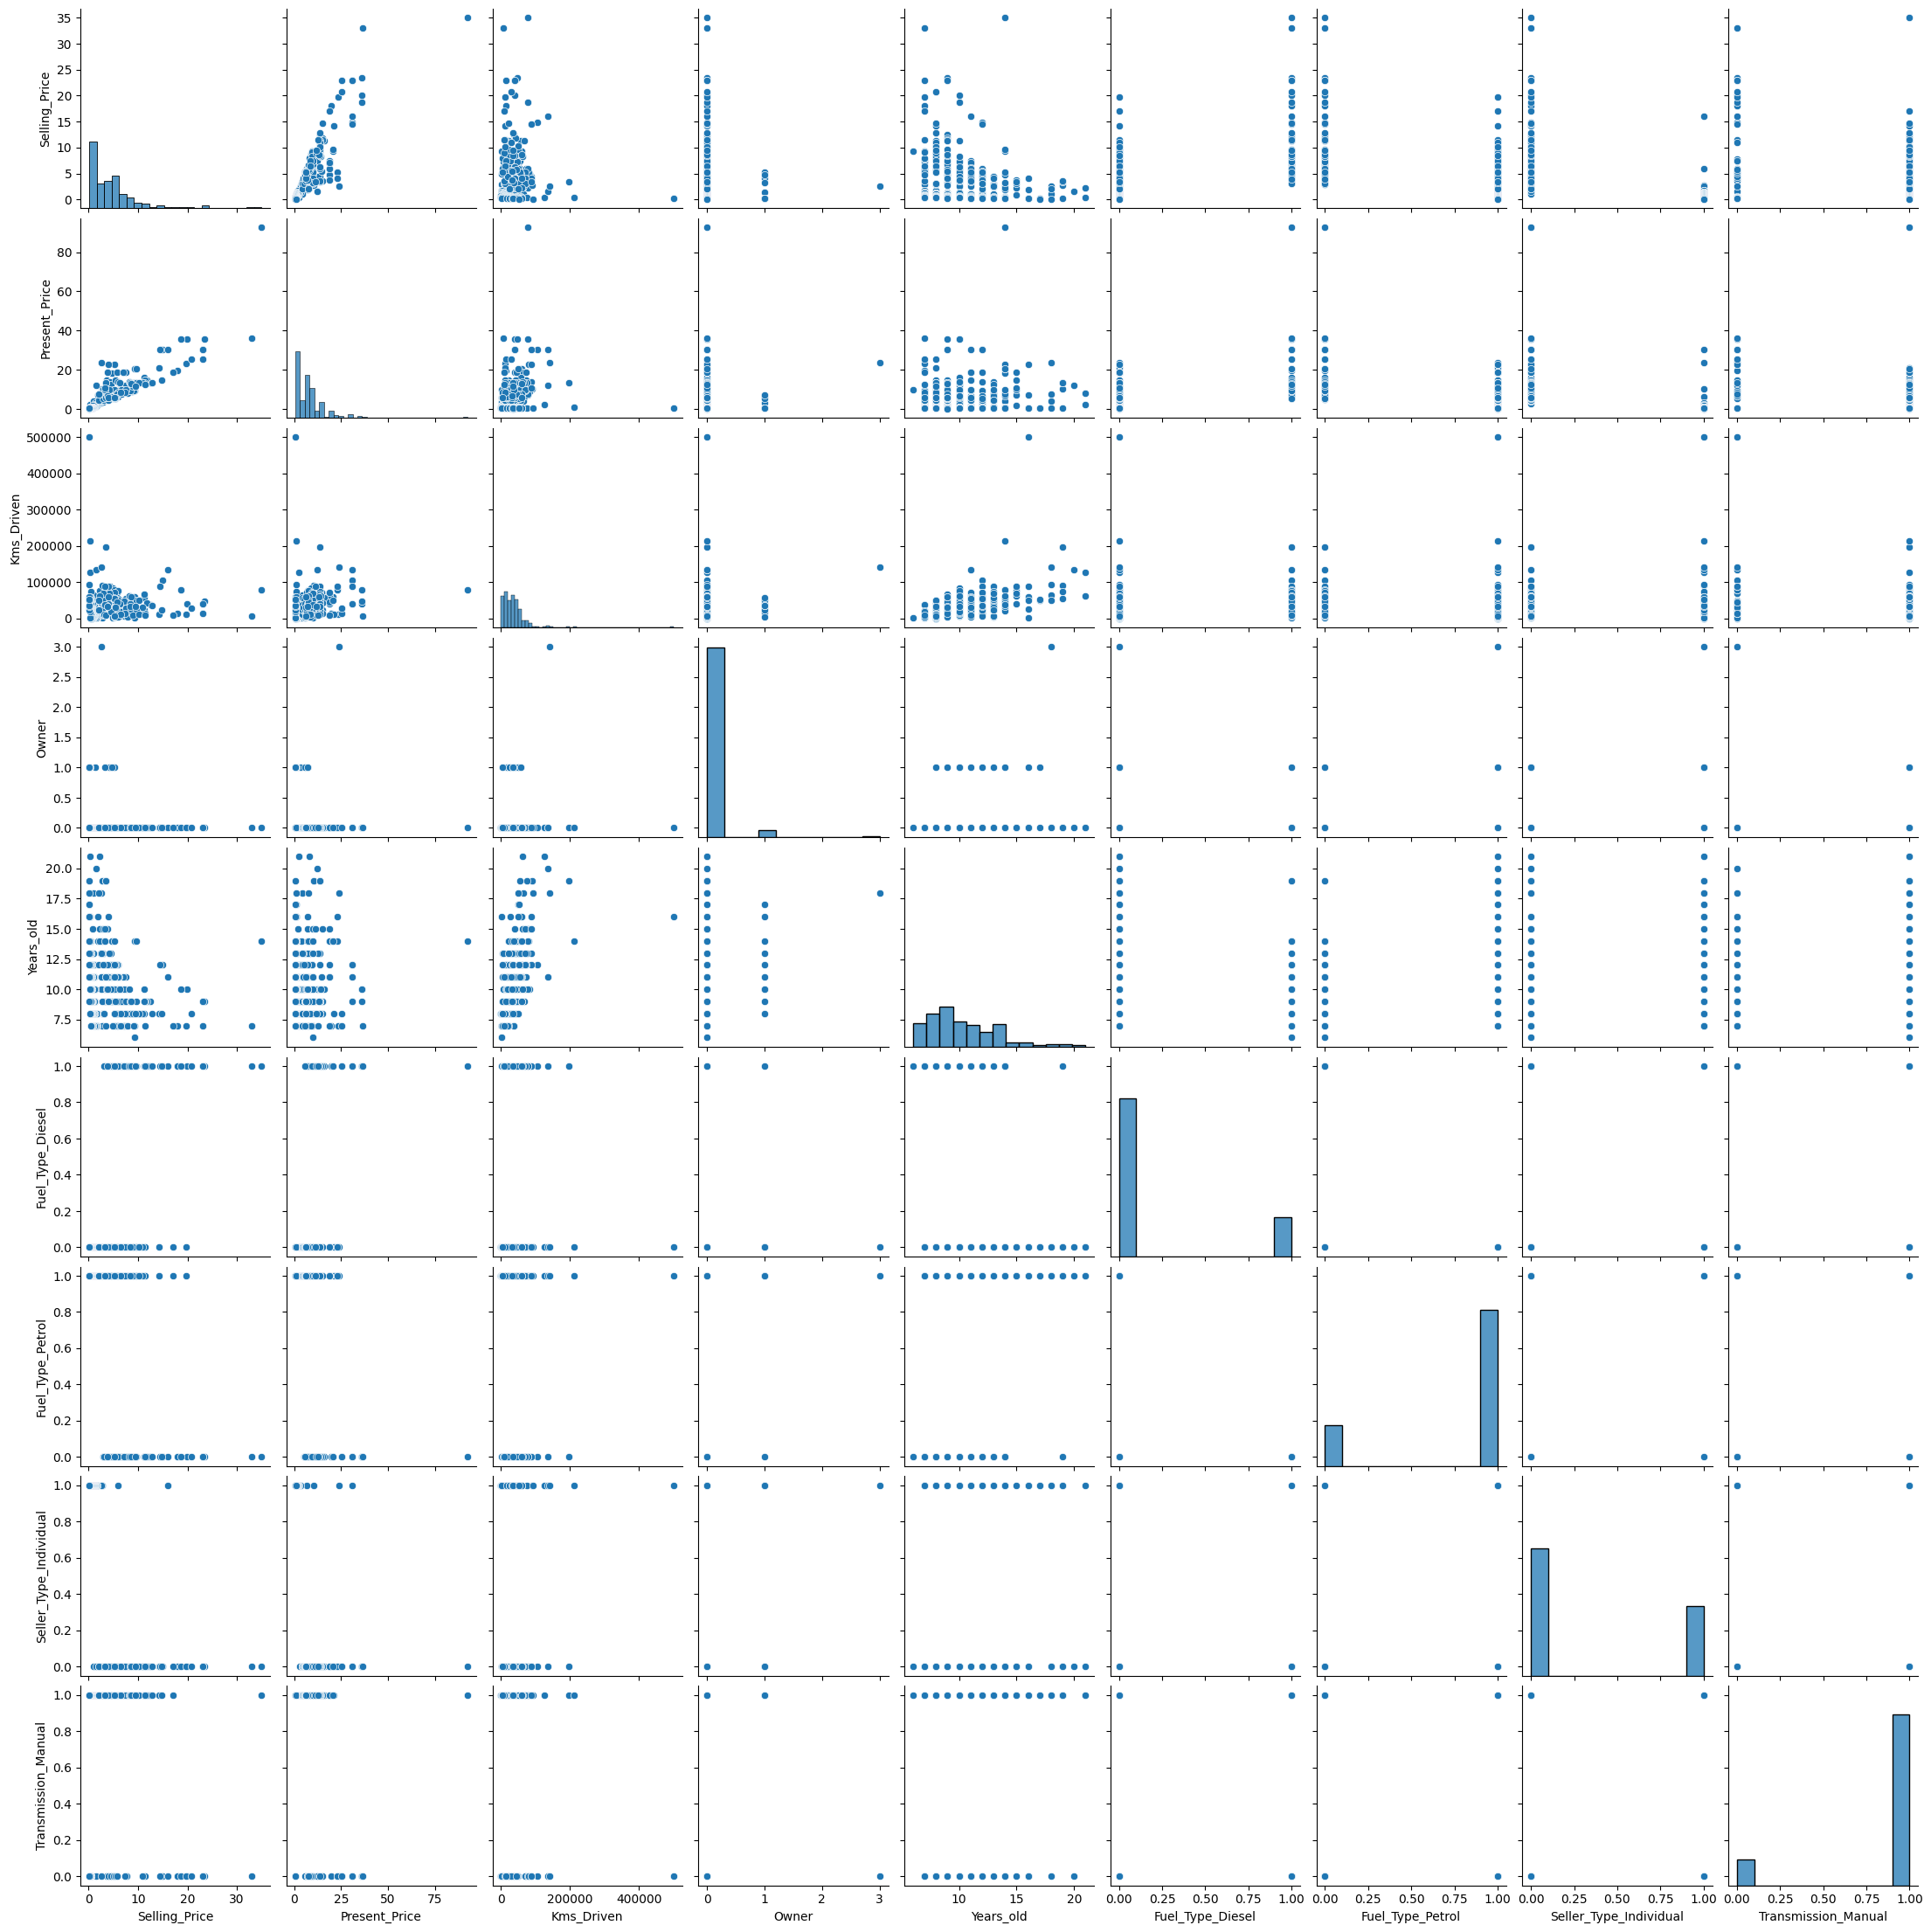

In [27]:
sns.pairplot(new_dataset)

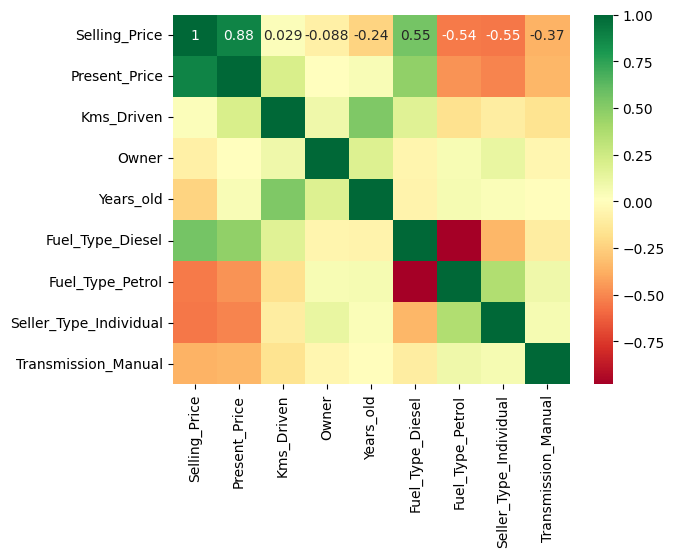

In [67]:
corrmat = new_dataset.corr()
top_feat = corrmat.index
h = sns.heatmap(new_dataset[top_feat].corr(), annot=True, cmap="RdYlGn")

In [29]:
new_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,10,False,True,False,True
1,4.75,9.54,43000,0,11,True,False,False,True
2,7.25,9.85,6900,0,7,False,True,False,True
3,2.85,4.15,5200,0,13,False,True,False,True
4,4.60,6.87,42450,0,10,True,False,False,True


In [30]:
x = new_dataset.iloc[:,1:]
y = new_dataset.iloc[:,0]

In [31]:
x.head()

,Present_Price,Kms_Driven,Owner,Years_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,10,False,True,False,True
1,9.54,43000,0,11,True,False,False,True
2,9.85,6900,0,7,False,True,False,True
3,4.15,5200,0,13,False,True,False,True
4,6.87,42450,0,10,True,False,False,True


In [32]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [33]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [34]:
print(model.feature_importances_)

[0.37572375 0.04184172 0.00053573 0.07378364 0.22982938 0.01131643
 0.13024984 0.13671951]


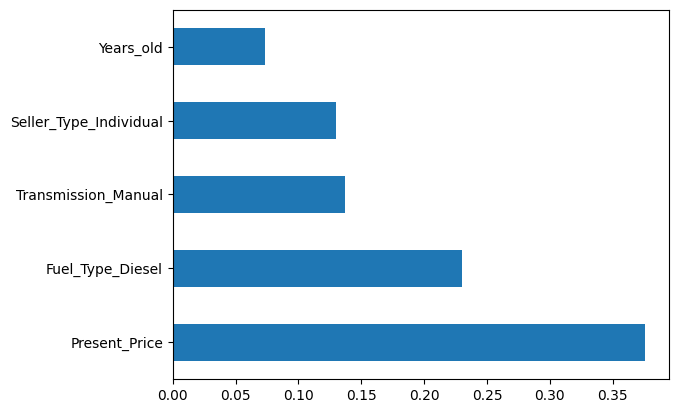

In [35]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [37]:
x_train

,Present_Price,Kms_Driven,Owner,Years_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
165,0.54,500,0,8,False,True,True,False
291,6.10,31427,0,9,False,True,False,True
9,8.92,42367,0,9,True,False,False,True
80,14.89,23000,0,8,True,False,False,True
288,13.60,34000,0,9,False,True,False,True
...,...,...,...,...,...,...,...,...
220,4.43,38488,0,7,False,True,False,True
1,9.54,43000,0,11,True,False,False,True
82,25.39,15000,0,7,True,False,False,False
293,9.90,38000,0,14,False,True,False,True


In [38]:
x_test

,Present_Price,Kms_Driven,Owner,Years_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
74,8.93,83000,0,10,True,False,False,True
83,13.46,38000,0,9,True,False,False,True
87,13.74,56000,0,12,False,True,False,True
244,9.40,49000,0,11,True,False,False,True
120,1.26,5700,0,8,False,True,True,True
...,...,...,...,...,...,...,...,...
96,25.39,29000,0,8,True,False,False,False
70,6.76,71000,0,10,True,False,False,True
22,8.01,50000,0,13,False,True,False,False
21,5.71,2400,0,7,False,True,False,True


In [39]:
y_train

165     0.45
291     5.40
9       7.45
80     14.73
288     8.40
       ...  
220     3.50
1       4.75
82     23.00
293     3.25
111     1.15
Name: Selling_Price, Length: 240, dtype: float64

In [40]:
y_train.shape

(240,)

In [41]:
y_test.shape

(61,)

In [42]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()

In [43]:
## Hyperparameters

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5,30, num = 6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [44]:
from sklearn.model_selection import RandomizedSearchCV

In [45]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
              }

In [46]:
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [47]:
rf = RandomForestRegressor()

In [48]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, scoring = 'neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [49]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packages\

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [50]:
prediction = rf_random.predict(x_test)

In [51]:
prediction

array([ 8.99431,  9.61932,  5.2861 ,  5.84905,  1.04223,  5.20605,
       21.79996,  4.13236,  0.62382,  1.05035,  0.80203,  8.07297,
        5.36551,  0.64505,  0.24224,  0.60691,  0.39506,  6.64291,
        0.61984,  9.78557,  3.54213,  0.35865,  5.11907,  0.50935,
        1.10834,  0.94841,  8.8149 ,  1.11941,  0.58171,  3.17602,
        0.70715,  0.73892,  3.7068 ,  0.43648,  3.72805,  0.58966,
        4.3214 ,  1.4011 ,  8.70518,  2.75908,  3.15203,  8.09411,
        5.46186,  0.38726,  9.69482,  0.58411,  3.0412 ,  2.09698,
        4.30856,  7.41018,  0.51337,  4.46597,  1.12366,  5.38283,
        0.49976,  6.85386, 20.21686,  5.17652,  4.11212,  5.3106 ,
       12.01503])

C:\Users\KIIT\AppData\Local\Temp\ipykernel_5060\1520944062.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


<Axes: xlabel='Selling_Price', ylabel='Density'>

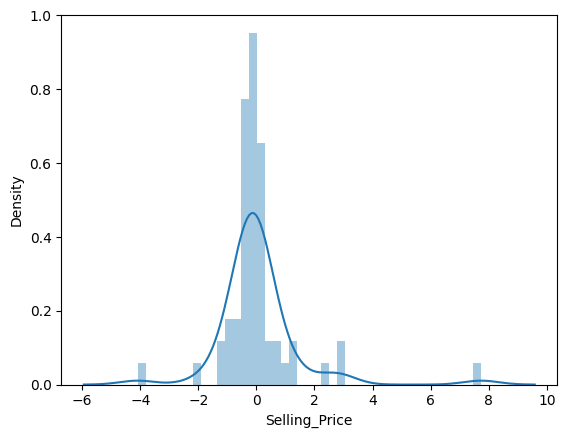

In [52]:
sns.distplot(y_test-prediction)

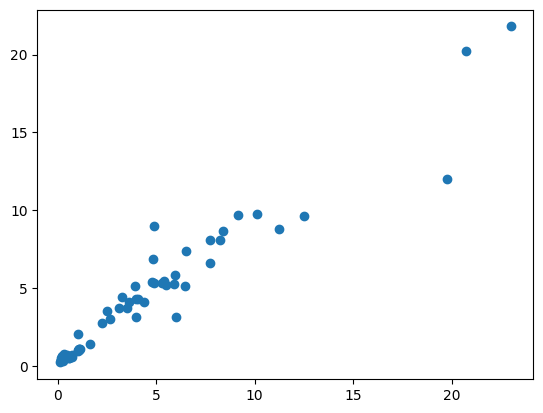

In [53]:
plt.scatter(y_test,prediction)

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [55]:
x_train = scaler.fit_transform(x_train)

In [56]:
x_test = scaler.transform(x_test)

In [57]:
x_train

array([[-8.12726798e-01, -9.01614742e-01, -1.73328931e-01, ...,
         5.06502224e-01,  1.42757651e+00, -2.64575131e+00],
       [-1.96582178e-01, -1.58678580e-01, -1.73328931e-01, ...,
         5.06502224e-01, -7.00487851e-01,  3.77964473e-01],
       [ 1.15922827e-01,  1.04124848e-01, -1.73328931e-01, ...,
        -1.97432499e+00, -7.00487851e-01,  3.77964473e-01],
       ...,
       [ 1.94108504e+00, -5.53292100e-01, -1.73328931e-01, ...,
        -1.97432499e+00, -7.00487851e-01, -2.64575131e+00],
       [ 2.24523857e-01, -7.80322793e-04, -1.73328931e-01, ...,
         5.06502224e-01, -7.00487851e-01,  3.77964473e-01],
       [-7.06342116e-01, -7.04632283e-01, -1.73328931e-01, ...,
         5.06502224e-01,  1.42757651e+00,  3.77964473e-01]])

In [58]:
x_test

array([[ 1.17031000e-01,  1.08022098e+00, -1.73328931e-01,
        -1.38995621e-01,  2.00000000e+00, -1.97432499e+00,
        -7.00487851e-01,  3.77964473e-01],
       [ 6.19033721e-01, -7.80322793e-04, -1.73328931e-01,
        -4.86484673e-01,  2.00000000e+00, -1.97432499e+00,
        -7.00487851e-01,  3.77964473e-01],
       [ 6.50062587e-01,  4.31620199e-01, -1.73328931e-01,
         5.55982484e-01, -5.00000000e-01,  5.06502224e-01,
        -7.00487851e-01,  3.77964473e-01],
       [ 1.69115168e-01,  2.63464440e-01, -1.73328931e-01,
         2.08493431e-01,  2.00000000e+00, -1.97432499e+00,
        -7.00487851e-01,  3.77964473e-01],
       [-7.32938286e-01, -7.76699036e-01, -1.73328931e-01,
        -8.33973726e-01, -5.00000000e-01,  5.06502224e-01,
         1.42757651e+00,  3.77964473e-01],
       [-2.40909129e-01, -8.05717916e-01, -1.73328931e-01,
        -4.86484673e-01, -5.00000000e-01,  5.06502224e-01,
        -7.00487851e-01,  3.77964473e-01],
       [ 2.51955175e+00,  4.726417

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
from sklearn.model_selection import cross_val_score

In [61]:
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [62]:
mse = cross_val_score(regression, x_train, y_train, scoring='neg_mean_squared_error', cv=5)

In [63]:
mse

array([-6.06683302, -1.44983862, -5.38862989, -3.10475465, -3.17936411])

In [64]:
np.mean(mse)

-3.837884055687944

In [65]:
prediction = regression.predict(x_test)

In [66]:
prediction

array([ 6.93583482,  9.45171367,  6.29671676,  6.84469197,  1.7621117 ,
        4.34078421, 18.02184496,  4.3558485 , -0.58091729,  1.35328945,
        2.69452754,  8.71935763,  4.84250739,  0.15789163, -2.49175194,
        1.5610039 ,  0.34225142,  7.87741746,  0.82767449,  8.09114404,
        9.760096  ,  0.11908231,  5.33650361,  0.80054588,  1.58168911,
       -0.24308859, 10.07073042,  1.4002208 ,  1.26179396,  2.93530321,
        1.65032419,  1.86581076,  3.26365949,  0.1606424 ,  4.96262241,
        1.1078141 ,  4.75716966,  2.40991776,  7.61712042,  2.78611828,
        4.36338046,  9.16508024,  6.00882852, -1.97189438,  8.02150679,
        1.12346692,  2.51601196, -0.33292983,  4.88263714,  7.40968056,
        1.07431756,  3.5620838 ,  1.38573569,  5.1688806 ,  0.73277525,
        6.22095851, 16.26774399,  6.06018252,  4.76122198,  5.19402901,
       13.862111  ])

In [72]:
y_test

74      4.90
83     12.50
87      5.90
244     5.95
120     1.05
       ...  
96     20.75
70      3.95
22      4.40
21      4.90
66     19.75
Name: Selling_Price, Length: 61, dtype: float64

C:\Users\KIIT\AppData\Local\Temp\ipykernel_5060\1390150406.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(prediction-y_test)


<Axes: xlabel='Selling_Price', ylabel='Density'>

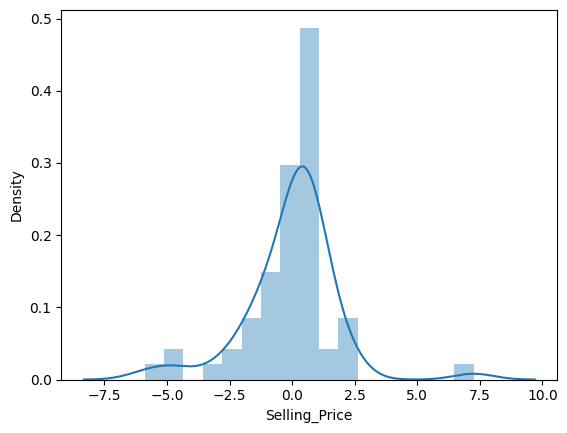

In [73]:
sns.distplot(prediction-y_test)

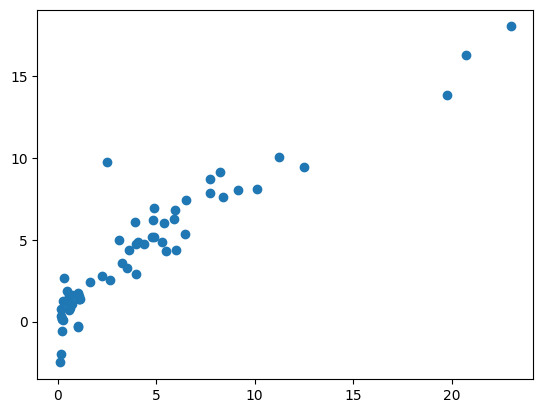

In [74]:
plt.scatter(y_test,prediction)